# Bees Data Challenge
- Candidate: Rogério Ferraz dos Santos
- Recruiter: Murilo
- Position: Data Scientist
- Date: 14/12/2023 - Start on: 14:20h

## 1 - Questions

1. **Customer Segmentation:** Can you segment customers based on their ordering 
behavior, such as frequency, time of day, or days since prior order, to better 
understand their preferences and propose ways to optimize marketing strategies?

2. **Inventory Management:** Implement a model to predict inventory levels for individual 
products in different departments and aisles based on historical order data, order 
frequency, and seasonality? Please use the designated test sample in the dataset to 
evaluate model performance. How can this model be used to optimize stock levels 
and reduce waste?

3. **Order Fulfillment (Bonus points):** How can we optimize the order fulfillment 
process, considering factors like day of the week and time of day when most orders 
are placed, to ensure timely and efficient deliveries to customers while minimizing 
operational costs?

## 2 - Data Explorer

In [1]:
import polars as pl

pl.Config.set_tbl_rows(20)
pl.Config.set_tbl_width_chars(5000)
pl.Config.set_fmt_str_lengths(5000)

polars.config.Config

In [32]:
import pandas as pd
import seaborn as sns

### 2.1 - Aisles
- aisle_id: Uniquely identifies each aisle.
- aisle: Contains the name of the aisle.

134 records, without nulls

In [3]:
aisles = (pl.read_csv("data/aisles.csv")
          .with_columns(pl.col("aisle_id").cast(pl.Int32))
)
aisles.describe()

describe,aisle_id,aisle
str,f64,str
"""count""",134.0,"""134"""
"""null_count""",0.0,"""0"""
"""mean""",67.5,null
"""std""",38.826537,null
"""min""",1.0,"""air fresheners candles"""
"""25%""",34.0,null
"""50%""",68.0,null
"""75%""",101.0,null
"""max""",134.0,"""yogurt"""


In [4]:
aisles.sort(by="aisle").head(10)

aisle_id,aisle
i32,str
101,"""air fresheners candles"""
66,"""asian foods"""
82,"""baby accessories"""
102,"""baby bath body care"""
92,"""baby food formula"""
8,"""bakery desserts"""
17,"""baking ingredients"""
97,"""baking supplies decor"""
132,"""beauty"""


### 2.2 - Departments
- department_id: Provides a unique identifier for each department.
- department: Displays the name of the department.

21 records, without nulls.


In [5]:
departments = (pl.read_csv("data/departments.csv")
               .with_columns(pl.col("department_id").cast(pl.Int32))
)
departments.describe()

describe,department_id,department
str,f64,str
"""count""",21.0,"""21"""
"""null_count""",0.0,"""0"""
"""mean""",11.0,null
"""std""",6.204837,null
"""min""",1.0,"""alcohol"""
"""25%""",6.0,null
"""50%""",11.0,null
"""75%""",16.0,null
"""max""",21.0,"""snacks"""


In [6]:
departments.sort(by="department").head(10)

department_id,department
i32,str
5,"""alcohol"""
18,"""babies"""
3,"""bakery"""
7,"""beverages"""
14,"""breakfast"""
10,"""bulk"""
15,"""canned goods"""
16,"""dairy eggs"""
20,"""deli"""


### 2.3 - Products
- product_id: Serves as a unique identifier for each product.
- product_name: Provides the name of the product.
- aisle_id: Acts as a reference key for the aisle associated with the product.
- department_id: Acts as a reference key for the department in which the product belongs.

49,888 records, without nulls


In [7]:
products = (pl.read_csv("data/products.csv")
            .with_columns(pl.col("product_id").cast(pl.Int32))
)

products.describe()

describe,product_id,product_name,aisle_id,department_id
str,f64,str,f64,f64
"""count""",49688.0,"""49688""",49688.0,49688.0
"""null_count""",0.0,"""0""",0.0,0.0
"""mean""",24844.5,null,67.769582,11.728687
"""std""",14343.834425,null,38.316162,5.85041
"""min""",1.0,"""#2 Coffee Filters""",1.0,1.0
"""25%""",12423.0,null,35.0,7.0
"""50%""",24845.0,null,69.0,13.0
"""75%""",37267.0,null,100.0,17.0
"""max""",49688.0,"""with a Splash of Pineapple Coconut Water""",134.0,21.0


In [8]:
products = (products
            .with_columns(
                pl.col("aisle_id").cast(pl.Int32),
                pl.col("department_id").cast(pl.Int32)
                )
            .join(aisles, on="aisle_id")
            .join(departments, on="department_id")
            .select([
                "product_id",
                "product_name",
                "department",
                "aisle"
            ])
            .with_columns((pl.col('department') + " - " + pl.col('aisle')).alias('department_aisle'))
)
products.sort("product_name").head(10)

product_id,product_name,department,aisle,department_aisle
i32,str,str,str,str
25773,"""#2 Coffee Filters""","""beverages""","""coffee""","""beverages - coffee"""
2158,"""#2 Cone White Coffee Filters""","""beverages""","""coffee""","""beverages - coffee"""
26685,"""#2 Mechanical Pencils""","""household""","""more household""","""household - more household"""
26381,"""#4 Natural Brown Coffee Filters""","""beverages""","""coffee""","""beverages - coffee"""
20604,"""& Go! Hazelnut Spread + Pretzel Sticks""","""pantry""","""spreads""","""pantry - spreads"""
27512,"""'Swingtop' Premium Lager""","""alcohol""","""beers coolers""","""alcohol - beers coolers"""
40776,"""(70% Juice!) Mountain Raspberry Juice Squeeze""","""beverages""","""juice nectars""","""beverages - juice nectars"""
11908,"""+Energy Black Cherry Vegetable & Fruit Juice""","""beverages""","""refrigerated""","""beverages - refrigerated"""
29882,""".5\"" Waterproof Tape""","""personal care""","""first aid""","""personal care - first aid"""


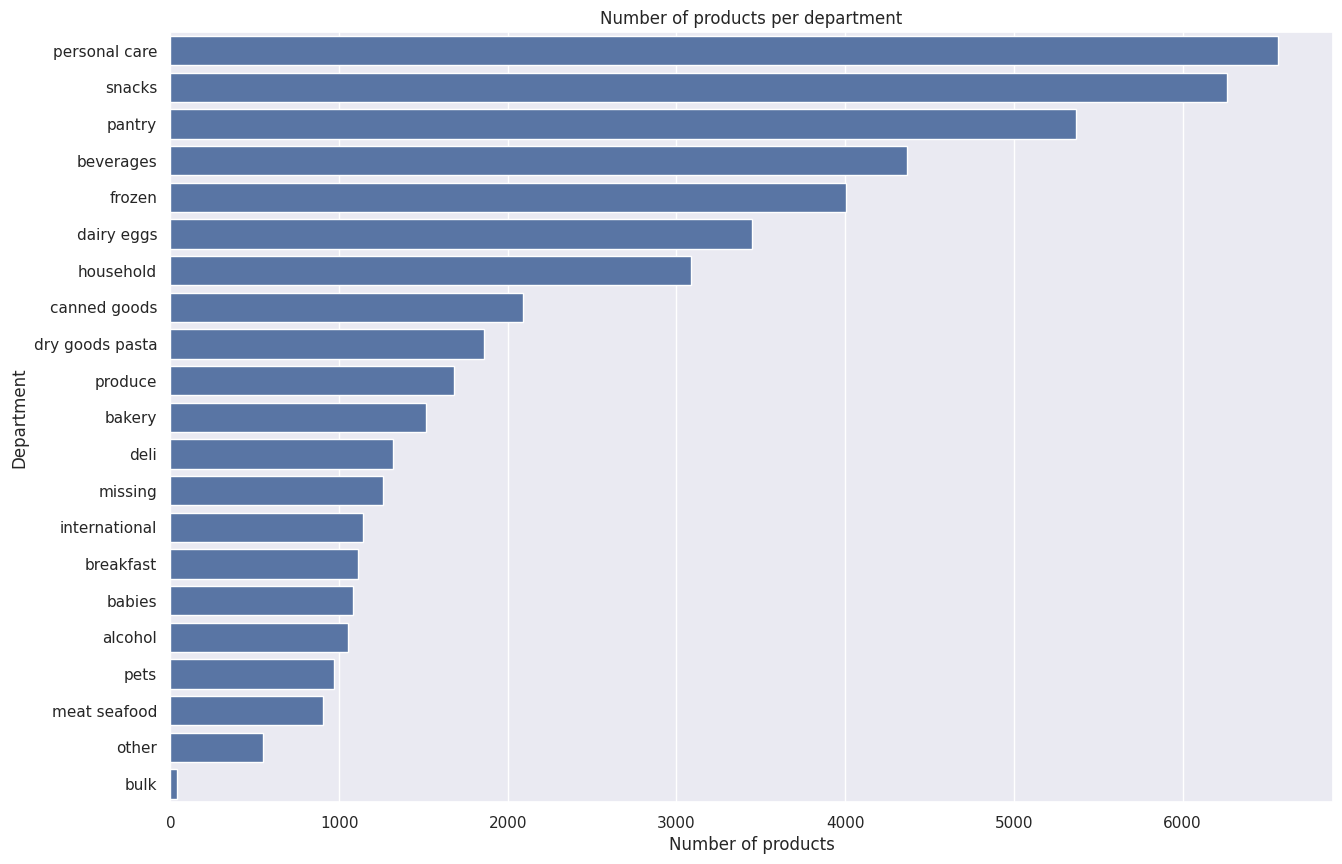

In [33]:
# using dataframe pd_products create a column graph with seaborn showing the number of products per department, order the departments by the number of products
import seaborn as sns
import matplotlib.pyplot as plt

pd_products = products.to_pandas()

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(y="department", data=pd_products, order=pd_products['department'].value_counts().index)
ax.set_title("Number of products per department")
ax.set_xlabel("Number of products")
ax.set_ylabel("Department")
plt.show()

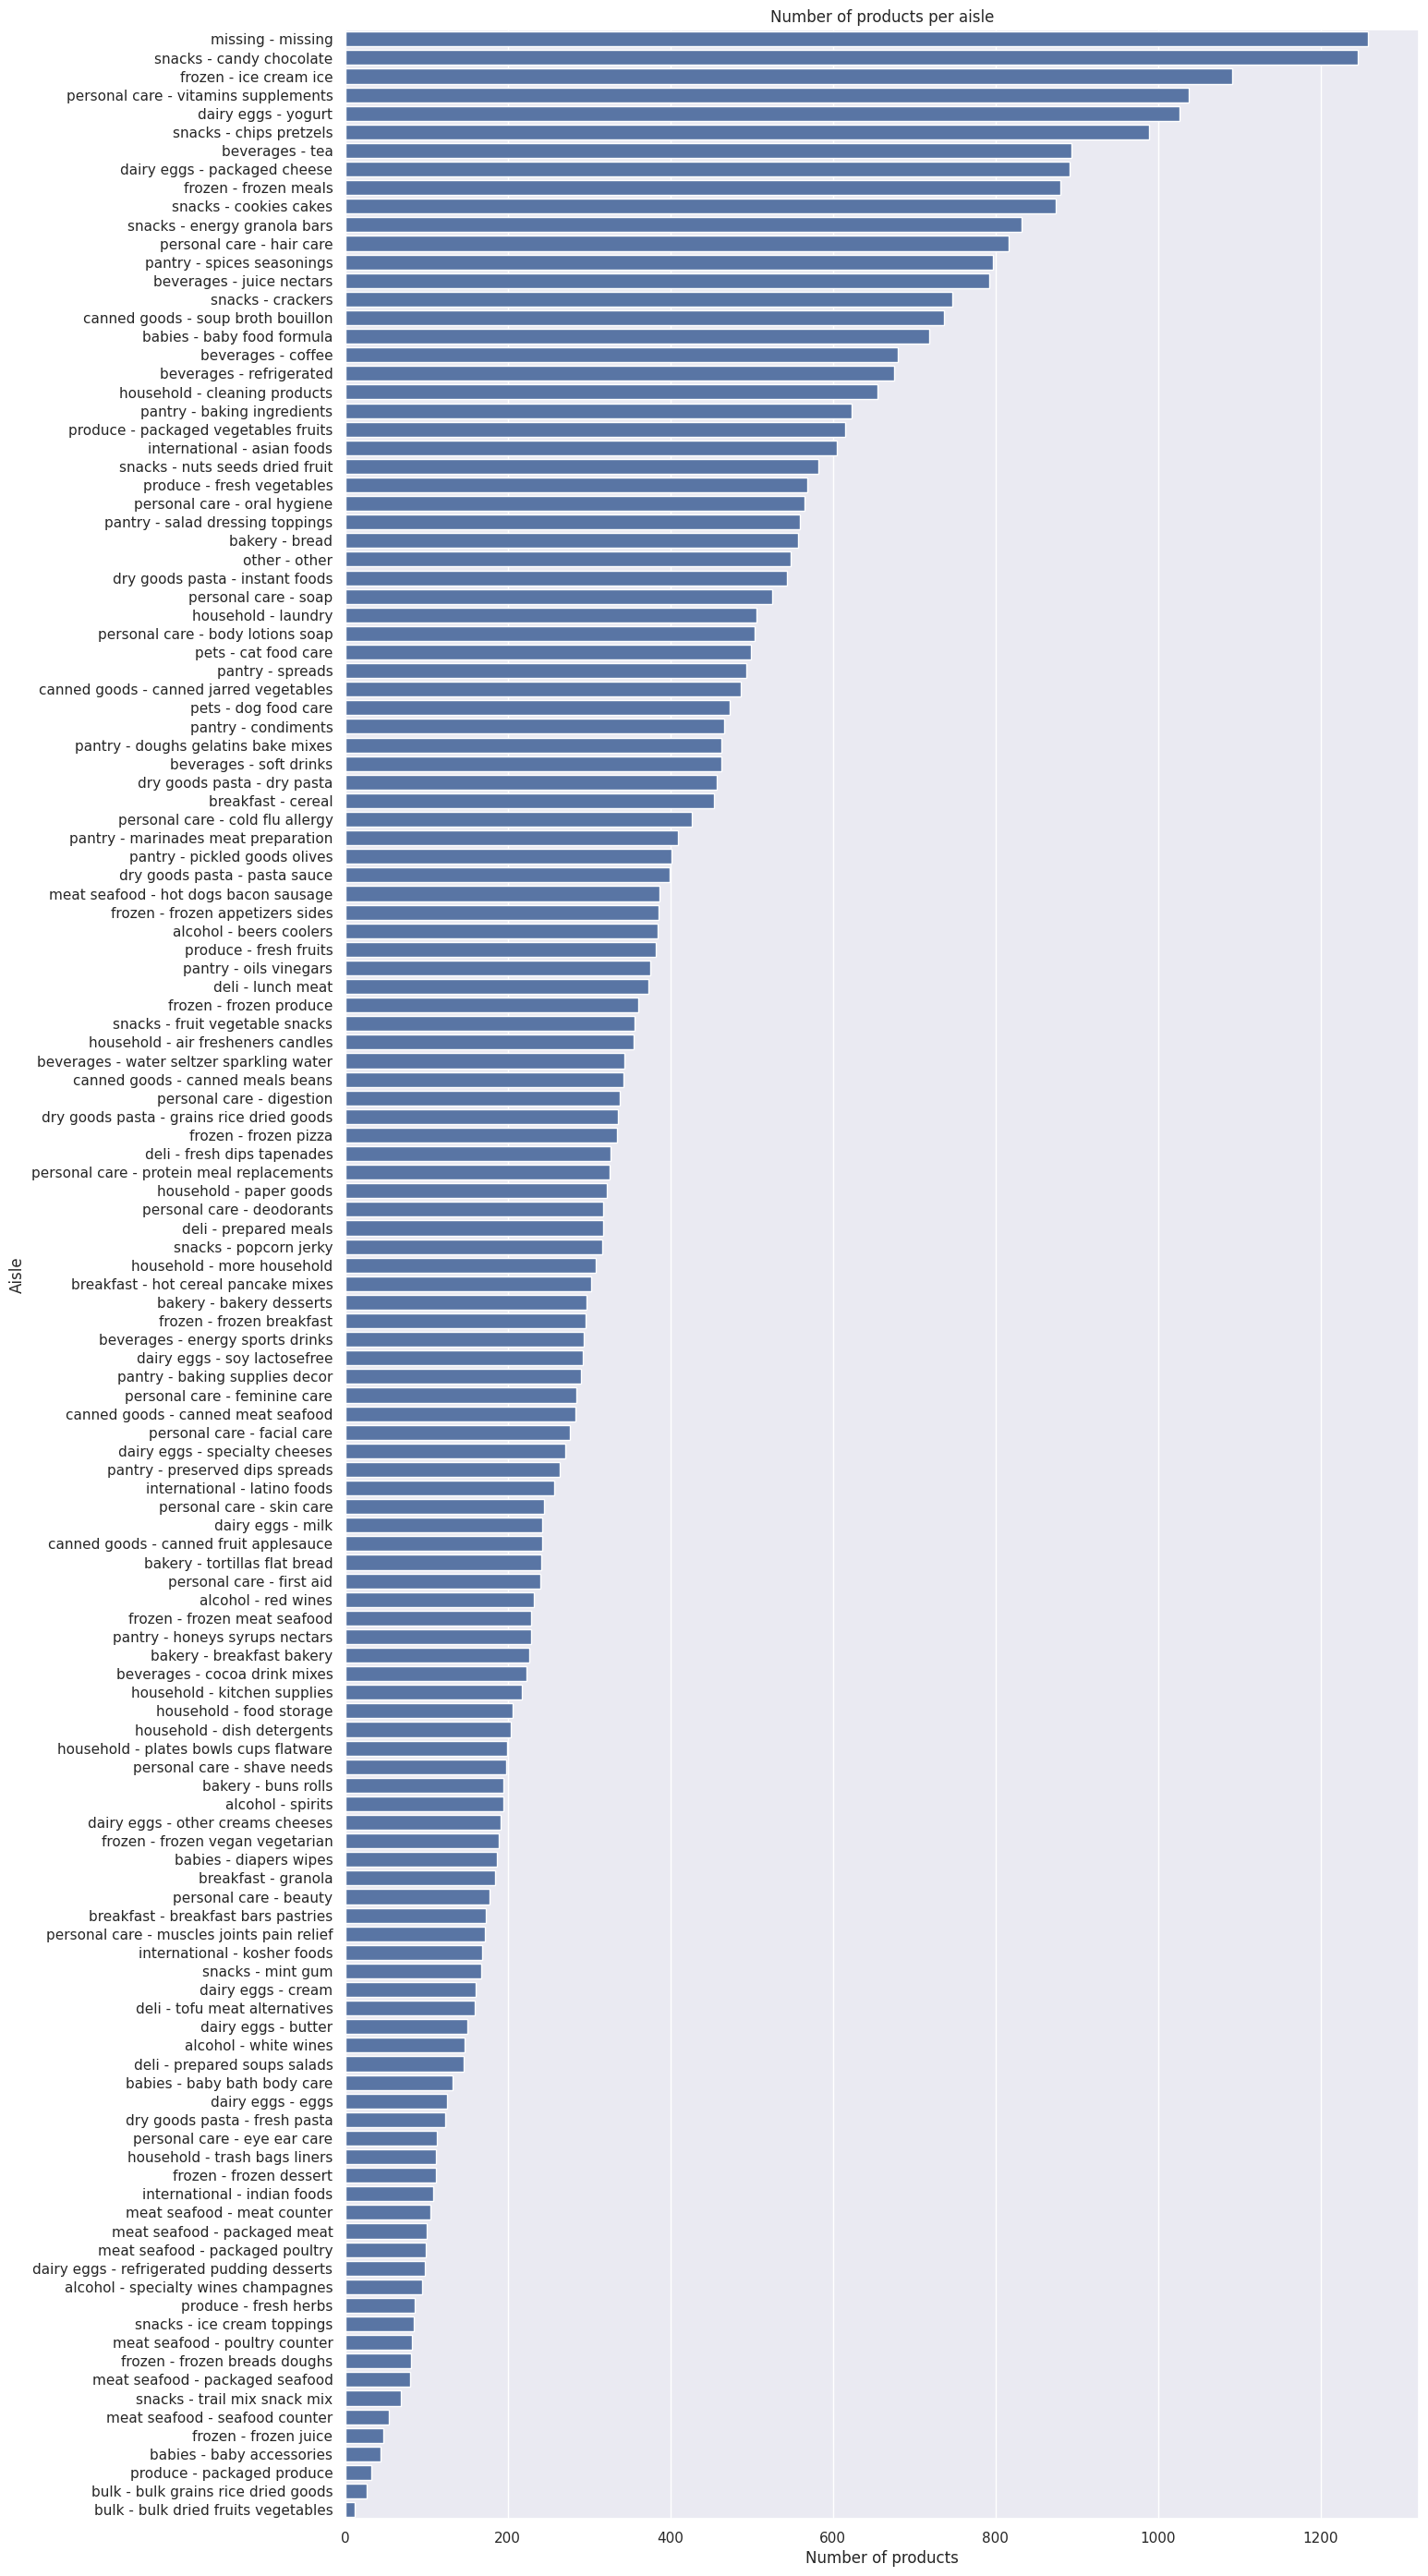

In [34]:
# using dataframe pd_products create a column graph with seaborn showing the number of products per aisle, order the columns by the number of products
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,35)})
ax = sns.countplot(y="department_aisle", data=pd_products, order=pd_products['department_aisle'].value_counts().index)
ax.set_title("Number of products per aisle")
ax.set_xlabel("Number of products")
ax.set_ylabel("Aisle")

plt.show()



#### Orders

- order_id: Uniquely identifies each order.
- user_id: Identifies the customer associated with the order.
- eval_set: Denotes the category to which this order belongs (refer to the SET descriptions below).
- order_number: Represents the sequence number of the order for a user, where 1 denotes the first order and 'n' indicates the nth order.
- order_dow: Indicates the day of the week when the order was placed.
- order_hour_of_day: Specifies the hour at which the order was initiated.
- days_since_prior: Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order).


In [35]:
def day_of_week(day):
    if day == 0:
        return "Sunday"
    elif day == 1:
        return "Monday"
    elif day == 2:
        return "Tuesday"
    elif day == 3:
        return "Wednesday"
    elif day == 4:
        return "Thursday"
    elif day == 5:
        return "Friday"
    elif day == 6:
        return "Saturday"
    else:
        return "Unknown"

In [36]:
orders = (pl.read_csv("data/orders.csv", infer_schema_length=1000)
          .with_columns(pl.col("days_since_prior_order").cast(pl.Int32).alias("days_since_prior_order"))
          .with_columns(pl.col("order_dow").map_elements(day_of_week).alias("day_of_week"))
)

orders.describe()

describe,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
str,f64,f64,str,f64,f64,f64,f64,str
"""count""",3.421083e6,3.421083e6,"""3421083""",3.421083e6,3.421083e6,3.421083e6,3.421083e6,"""3421083"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,206209.0,"""0"""
"""mean""",1.710542e6,102978.208059,null,17.154858,2.776219,13.452015,11.114836,null
"""std""",987581.739823,59533.717794,null,17.733164,2.046829,4.226088,9.206737,null
"""min""",1.0,1.0,"""prior""",1.0,0.0,0.0,0.0,"""Friday"""
"""25%""",855271.0,51394.0,null,5.0,1.0,10.0,4.0,null
"""50%""",1.710542e6,102689.0,null,11.0,3.0,13.0,7.0,null
"""75%""",2.565813e6,154385.0,null,23.0,5.0,16.0,15.0,null
"""max""",3.421083e6,206209.0,"""train""",100.0,6.0,23.0,30.0,"""Wednesday"""


In [37]:
orders.head(5)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
i64,i64,str,i64,i64,i64,i32,str
2539329,1,"""prior""",1,2,8,null,"""Tuesday"""
2398795,1,"""prior""",2,3,7,15,"""Wednesday"""
473747,1,"""prior""",3,3,12,21,"""Wednesday"""
2254736,1,"""prior""",4,4,7,29,"""Thursday"""
431534,1,"""prior""",5,4,15,28,"""Thursday"""


In [38]:
# qtd orders eval_set
orders.group_by("eval_set").agg(pl.count("order_id").alias("qtd_orders"))

eval_set,qtd_orders
str,u32
"""prior""",3214874
"""test""",75000
"""train""",131209


#### Number of orders per day of the week

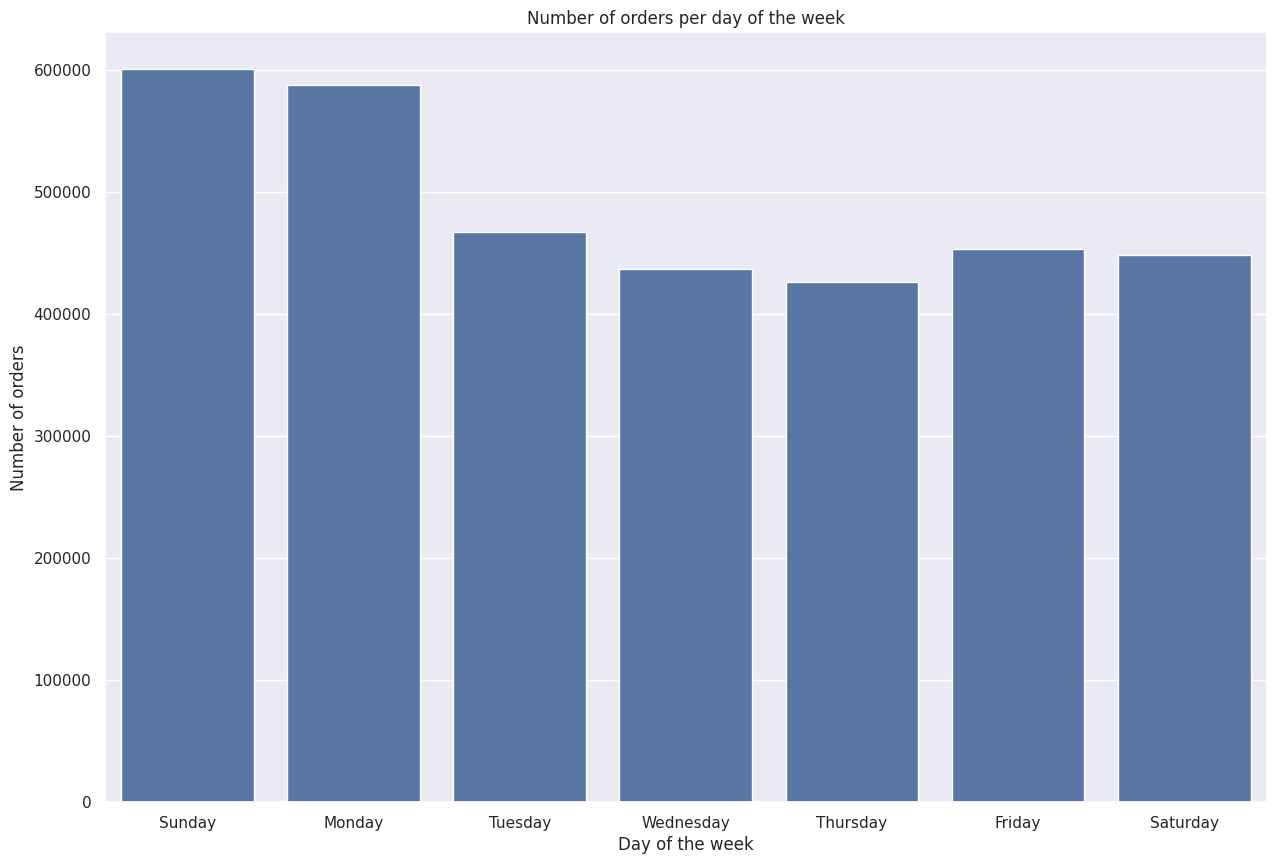

In [39]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="day_of_week", data=orders.to_pandas(), order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_title("Number of orders per day of the week")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Number of orders")
plt.show()

#### Number of orders per hour of the day

Text(0.5, 1.0, 'Number of orders per hour of the day')

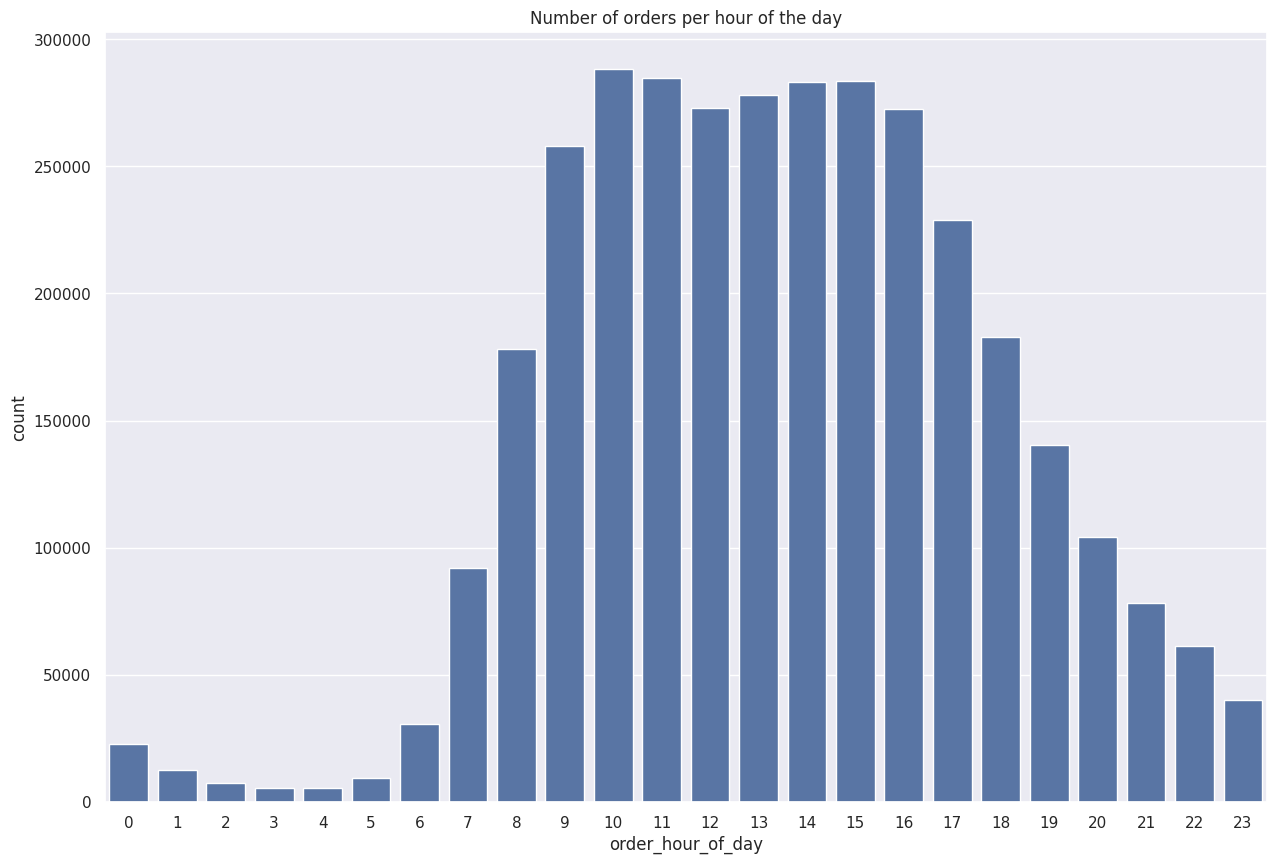

In [40]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="order_hour_of_day", data=orders.to_pandas())
ax.set_title("Number of orders per hour of the day")

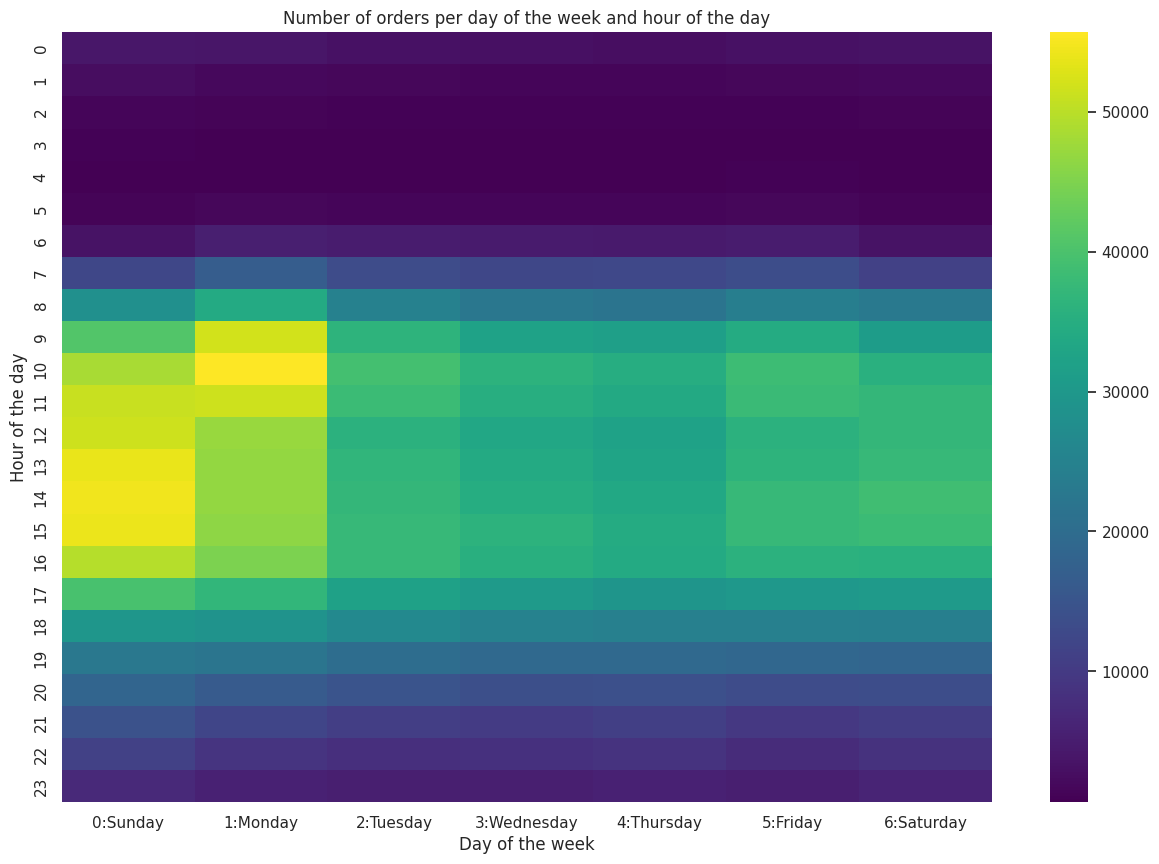

In [41]:
pd_orders = orders.to_pandas()
pd_orders['day_of_week'] = pd_orders['order_dow'].astype(str) + ':' + pd_orders['day_of_week']

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.heatmap(pd_orders.pivot_table(index="order_hour_of_day", columns="day_of_week", values="order_id", aggfunc="count"), cmap="viridis", annot=False, cbar=True)
ax.set_title("Number of orders per day of the week and hour of the day")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Hour of the day")
plt.show()

#### Produtos por Ordem (prior)

In [42]:
products_prior = (pl.read_csv("data/order_products__prior.csv")
                  .with_columns(pl.col("product_id").cast(pl.Int32))
)

products_prior.describe()

describe,order_id,product_id,add_to_cart_order,reordered
str,f64,f64,f64,f64
"""count""",3.2434489e7,3.2434489e7,3.2434489e7,3.2434489e7
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.7107e6,25576.337535,8.351076,0.589697
"""std""",987300.696453,14096.68909,7.126671,0.491889
"""min""",2.0,1.0,1.0,0.0
"""25%""",855943.0,13530.0,3.0,0.0
"""50%""",1.711048e6,25256.0,6.0,1.0
"""75%""",2.565514e6,37935.0,11.0,1.0
"""max""",3.421083e6,49688.0,145.0,1.0


In [43]:
products_prior.head(10)

order_id,product_id,add_to_cart_order,reordered
i64,i32,i64,i64
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0


In [44]:
len(products_prior)

32434489

#### Produtos por Ordem (train)

In [45]:
products_train = (pl.read_csv("data/order_products__train.csv")
                  .with_columns(pl.col("product_id").cast(pl.Int32))
                  )

products_train.describe()

describe,order_id,product_id,add_to_cart_order,reordered
str,f64,f64,f64,f64
"""count""",1.384617e6,1.384617e6,1.384617e6,1.384617e6
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.7063e6,25556.235729,8.758044,0.598594
"""std""",989732.648868,14121.272449,7.423936,0.490183
"""min""",1.0,1.0,1.0,0.0
"""25%""",843370.0,13380.0,3.0,0.0
"""50%""",1.70188e6,25298.0,7.0,1.0
"""75%""",2.568023e6,37940.0,12.0,1.0
"""max""",3.42107e6,49688.0,80.0,1.0


In [46]:
products_train.head(10)

order_id,product_id,add_to_cart_order,reordered
i64,i32,i64,i64
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1
1,13176,6,0
1,47209,7,0
1,22035,8,1
36,39612,1,0


In [47]:
len(products_train)

1384617

### Customer Segmentation
Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

#### Feature engineering


In [48]:
orders.group_by("eval_set").agg(pl.count("order_id").alias("qtd_orders"))

eval_set,qtd_orders
str,u32
"""train""",131209
"""prior""",3214874
"""test""",75000


In [49]:
orders_client = (orders
                .group_by("user_id").agg(
                     pl.count("order_id").alias("qtd_orders"),
                     pl.mean("days_since_prior_order").alias("avg_days")
                     )
)

orders_client.head(5)

user_id,qtd_orders,avg_days
i64,u32,f64
176577,17,16.875
179715,49,7.583333
32539,5,22.75
86907,8,19.0
89140,6,2.6


#### Histogram - Number of orders per client

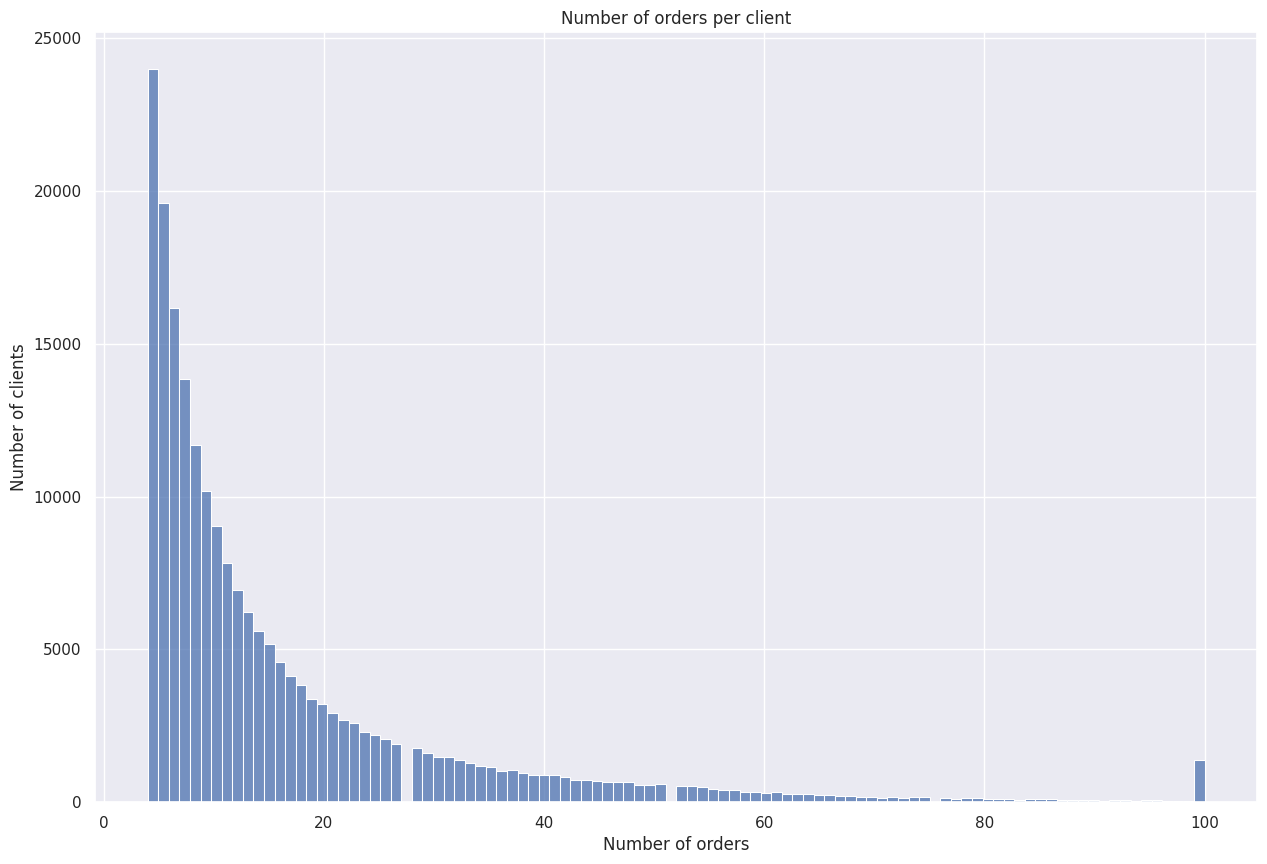

In [50]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="qtd_orders", bins=100)
ax.set_title("Number of orders per client")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Number of clients")
plt.show()


🤔 Something strange here... why this group with 1374 clients with "exactly" 100 orders?
- maybe the 'cap' the orders to maximum of 100?
- maybe it's because the syntetic data generation?
- well, anyway, this could introduce bias in the models that will be built next.

In [51]:
clientes_100 = orders_client.filter(pl.col("qtd_orders") == 100)
clientes_100.head(10)

user_id,qtd_orders,avg_days
i64,u32,f64
133865,100,3.131313
36335,100,3.343434
102666,100,3.464646
106724,100,2.79798
17974,100,3.010101
36588,100,1.313131
200964,100,2.949495
70922,100,2.616162
169226,100,3.454545


In [52]:
# qty clients with 100 orders
len(clientes_100)

1374

In [53]:
# an example of a client with 100 orders
orders.filter(pl.col("user_id") == 140665)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
i64,i64,str,i64,i64,i64,i32,str
2245937,140665,"""prior""",1,2,13,null,"""Tuesday"""
780133,140665,"""prior""",2,1,13,6,"""Monday"""
785232,140665,"""prior""",3,3,13,2,"""Wednesday"""
1810094,140665,"""prior""",4,2,15,6,"""Tuesday"""
110973,140665,"""prior""",5,5,14,3,"""Friday"""
634994,140665,"""prior""",6,4,14,6,"""Thursday"""
2372608,140665,"""prior""",7,1,14,4,"""Monday"""
1529930,140665,"""prior""",8,5,14,4,"""Friday"""
468574,140665,"""prior""",9,0,14,9,"""Sunday"""


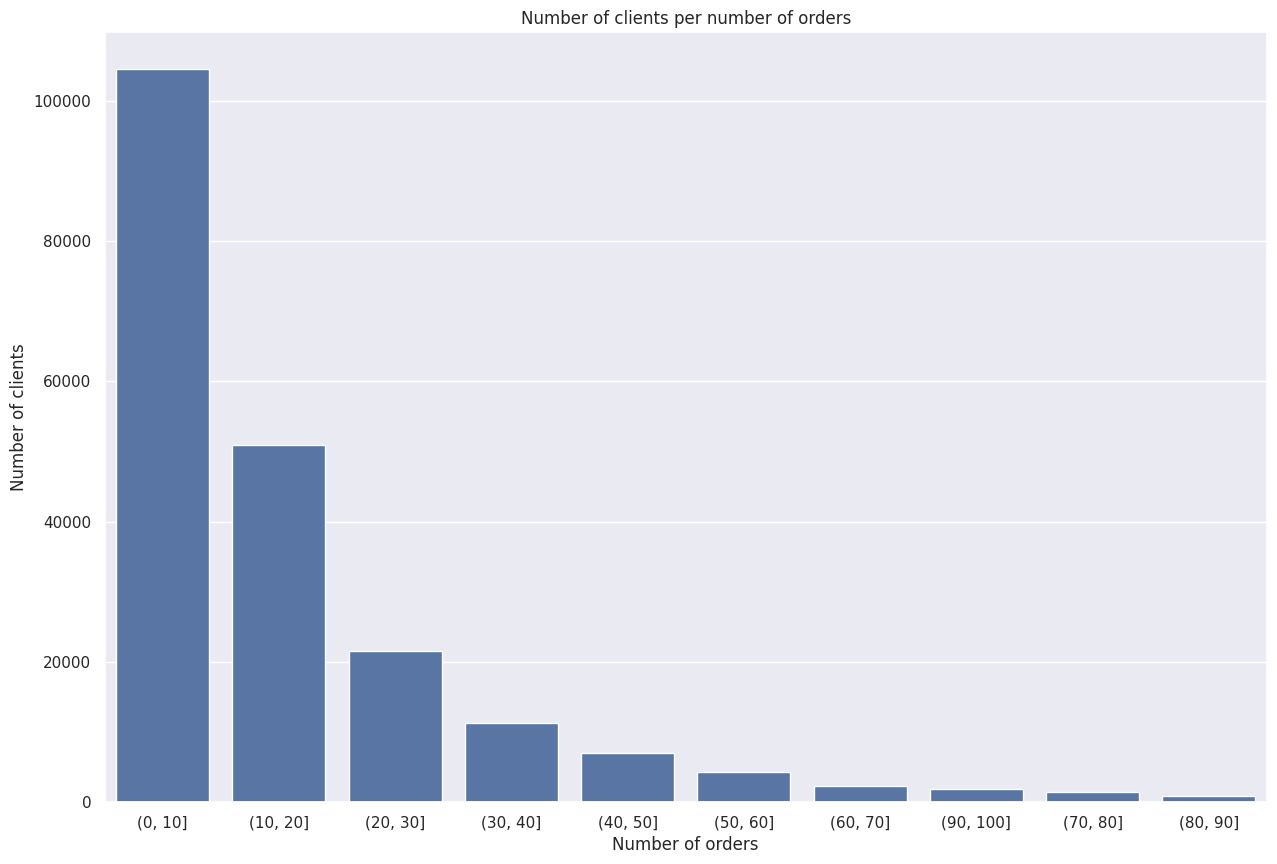

In [54]:
pd_orders_client = orders_client.to_pandas()
# using pd_orders_client create bins with the number of orders per client
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100]
pd_orders_client['qtd_orders_bins'] = pd.cut(pd_orders_client['qtd_orders'], bins=bins)

# count qtd clients per bin
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="qtd_orders_bins", data=pd_orders_client, order=pd_orders_client['qtd_orders_bins'].value_counts().index)
ax.set_title("Number of clients per number of orders")
ax.set_xlabel("Number of orders")
ax.set_ylabel("Number of clients")
plt.show()

#### Histogram - Avg days between orders

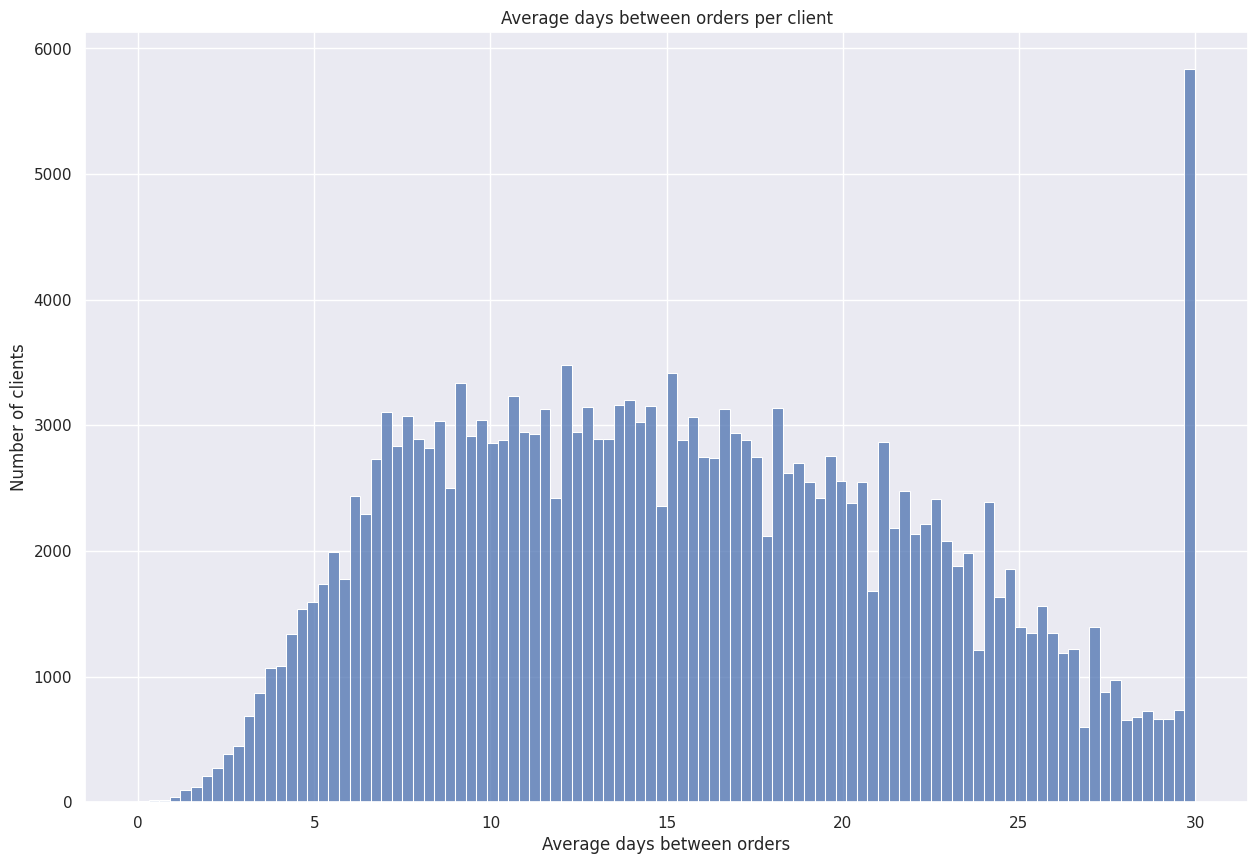

In [55]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.histplot(data=orders_client.to_pandas(), x="avg_days", bins=100)
ax.set_title("Average days between orders per client")
ax.set_xlabel("Average days between orders")
ax.set_ylabel("Number of clients")
plt.show()


👍 Another anomaly, this time expected. 5573 clients with exactly 30 days between orders. This is because the column days_since_prior_order is capped at 30.
But... depending on the model, could be necessary to made adjust to not introduce bias.

In [56]:
len(orders_client.filter(pl.col("avg_days") == 30))

5573

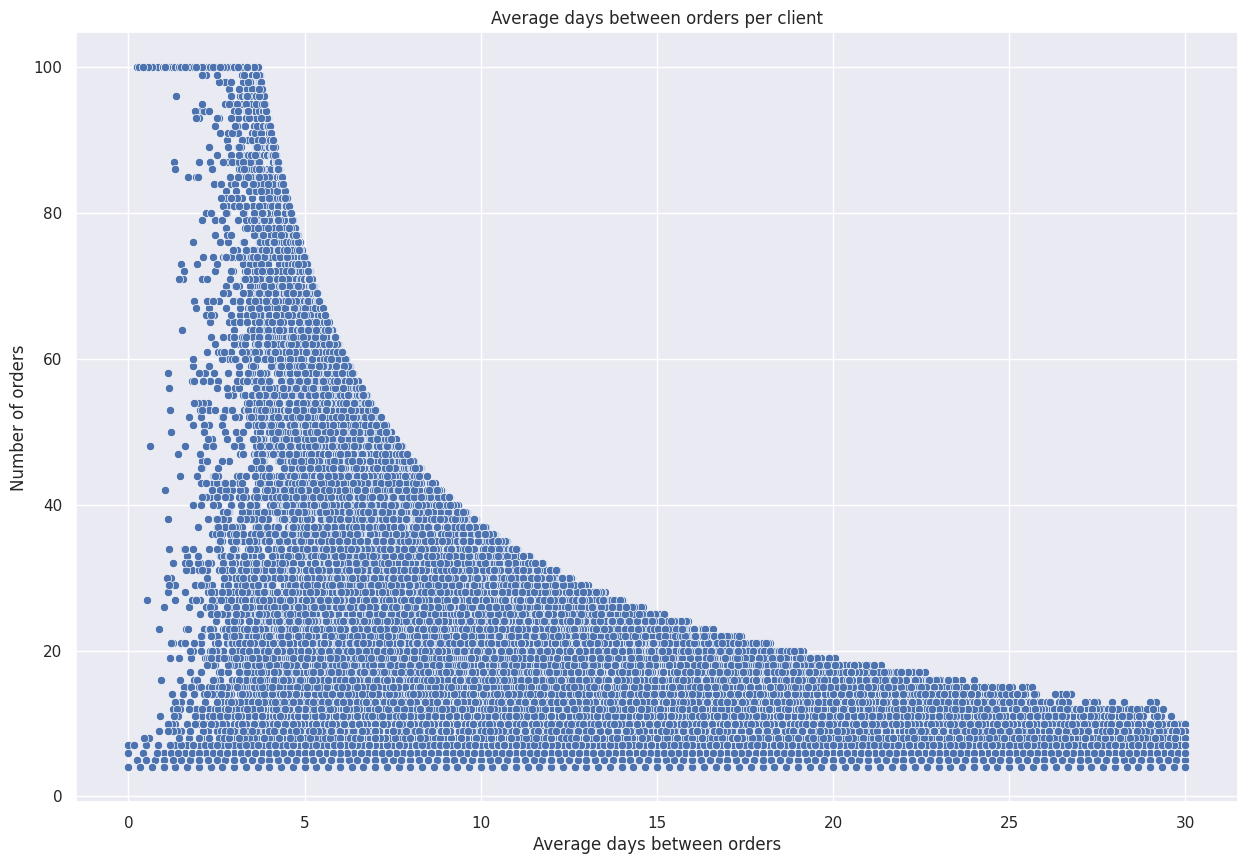

In [57]:
# create scatter plot using avg_days and qtd_orders
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(data=orders_client.to_pandas(), x="avg_days", y="qtd_orders")
ax.set_title("Average days between orders per client")
ax.set_xlabel("Average days between orders")
ax.set_ylabel("Number of orders")
plt.show()

In [58]:
orders

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
i64,i64,str,i64,i64,i64,i32,str
2539329,1,"""prior""",1,2,8,null,"""Tuesday"""
2398795,1,"""prior""",2,3,7,15,"""Wednesday"""
473747,1,"""prior""",3,3,12,21,"""Wednesday"""
2254736,1,"""prior""",4,4,7,29,"""Thursday"""
431534,1,"""prior""",5,4,15,28,"""Thursday"""
3367565,1,"""prior""",6,2,7,19,"""Tuesday"""
550135,1,"""prior""",7,1,9,20,"""Monday"""
3108588,1,"""prior""",8,1,14,14,"""Monday"""
2295261,1,"""prior""",9,1,16,0,"""Monday"""


In [59]:
products

product_id,product_name,department,aisle,department_aisle
i32,str,str,str,str
1,"""Chocolate Sandwich Cookies""","""snacks""","""cookies cakes""","""snacks - cookies cakes"""
2,"""All-Seasons Salt""","""pantry""","""spices seasonings""","""pantry - spices seasonings"""
3,"""Robust Golden Unsweetened Oolong Tea""","""beverages""","""tea""","""beverages - tea"""
4,"""Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce""","""frozen""","""frozen meals""","""frozen - frozen meals"""
5,"""Green Chile Anytime Sauce""","""pantry""","""marinades meat preparation""","""pantry - marinades meat preparation"""
6,"""Dry Nose Oil""","""personal care""","""cold flu allergy""","""personal care - cold flu allergy"""
7,"""Pure Coconut Water With Orange""","""beverages""","""juice nectars""","""beverages - juice nectars"""
8,"""Cut Russet Potatoes Steam N' Mash""","""frozen""","""frozen produce""","""frozen - frozen produce"""
9,"""Light Strawberry Blueberry Yogurt""","""dairy eggs""","""yogurt""","""dairy eggs - yogurt"""


In [60]:
orders_products = (orders
                   .join(products_prior, on="order_id")
                   .join(products, on="product_id")
                   .select(pl.col(["order_id","user_id","order_hour_of_day","day_of_week","product_id","department","aisle"]))
)

orders_products.head(10)

order_id,user_id,order_hour_of_day,day_of_week,product_id,department,aisle
i64,i64,i64,str,i32,str,str
2,202279,9,"""Friday""",33120,"""dairy eggs""","""eggs"""
2,202279,9,"""Friday""",28985,"""produce""","""fresh vegetables"""
2,202279,9,"""Friday""",9327,"""pantry""","""spices seasonings"""
2,202279,9,"""Friday""",45918,"""pantry""","""oils vinegars"""
2,202279,9,"""Friday""",30035,"""pantry""","""baking ingredients"""
2,202279,9,"""Friday""",17794,"""produce""","""fresh vegetables"""
2,202279,9,"""Friday""",40141,"""pantry""","""doughs gelatins bake mixes"""
2,202279,9,"""Friday""",1819,"""pantry""","""spreads"""
2,202279,9,"""Friday""",43668,"""produce""","""packaged vegetables fruits"""


In [1]:
import cudf

/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so
  warnings.warn(str(e))


ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: libcuda.so.1: cannot open shared object file: No such file or directory
================================================================


In [257]:
orders_products = orders_products.to_pandas()

c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

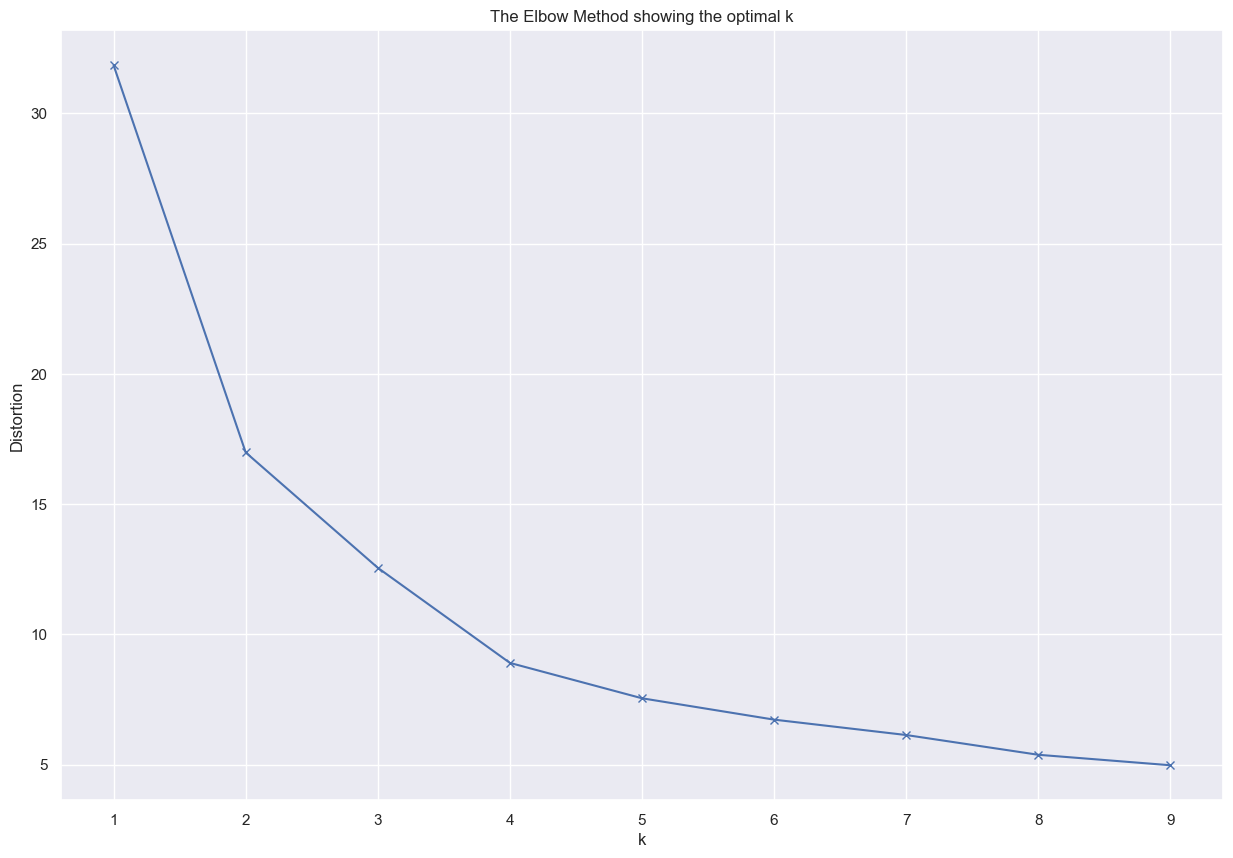

c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [260]:
# using orders_products create a clustering with kmeans using the columns department and aisle, use the elbow method to find the best number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

#X = orders_products[["department", "aisle","order_hour_of_day","day_of_week"]]
X = orders_products[["department", "day_of_week"]]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [261]:
# using orders_products create a clustering with kmeans using the columns department and aisle, use the silhouette method to find the best number of clusters
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,10)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot the silhouette
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

c:\Users\roger\code\bees-data-challenge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
# using orders_products create a clustering with kmeans using the columns department and aisle
# use the elbow method to find the best number of clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
orders_products['department'] = le.fit_transform(orders_products['department'])
orders_products['aisle'] = le.fit_transform(orders_products['aisle'])

X = orders_products[['department', 'aisle']].to_numpy()

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

orders_products['cluster'] = kmeans.labels_

orders_products.head(10)

In [259]:
orders_products

,order_id,user_id,product_id,department,aisle,cluster
0,2,202279,33120,7,41,8
1,2,202279,28985,19,53,1
2,2,202279,9327,16,122,9
3,2,202279,45918,16,89,0
4,2,202279,30035,16,6,6
...,...,...,...,...,...,...
32434484,3421083,25247,39678,11,37,8
32434485,3421083,25247,11352,20,32,7
32434486,3421083,25247,4600,10,56,1
32434487,3421083,25247,24852,19,50,1


In [ ]:
# using orders_products create a graph with seaborn showing the number of products per cluster
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="cluster", data=orders_products)
ax.set_title("Number of products per cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Number of products")
plt.show()